# __Нейронная сеть для оценкии соответсвия (Фотохостинг)__


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><u>Описание проекта</u></a></span></li>
<li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><u>Описание данных</u></a></span></li>
<li><span><a href="#Импорты" data-toc-modified-id="Импорты-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><u>Импорты</u></a></span></li>
<li><span><a href="#Константы" data-toc-modified-id="Константы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><u>Константы</u></a></span></li>
<li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><u>Загрузка данных</u></a></span></li>
<li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><u>Общая информация</u></a></span></li>
<li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><u>Предобработка данных</u></a></span></li>
<li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><u>Исследовательский анализ данных</u></a></span></li>
<li><span><a href="#Векторизация-изображений" data-toc-modified-id="Векторизация-изображений-9"><span class="toc-item-num">9&nbsp;&nbsp;</span><u>Векторизация изображений</u></a></span></li>
<li><span><a href="#Векторизация-текстов" data-toc-modified-id="Векторизация-текстов-10"><span class="toc-item-num">10&nbsp;&nbsp;</span><u>Векторизация текстов</u></a></span></li>
<li><span><a href="#Объединение-векторов" data-toc-modified-id="Объединение-векторов-11"><span class="toc-item-num">11&nbsp;&nbsp;</span><u>Объединение векторов</u></a></span></li>
<li><span><a href="#Обучение-модели-предсказания-соответствия" data-toc-modified-id="Обучение-модели-предсказания-соответствия-12"><span class="toc-item-num">12&nbsp;&nbsp;</span><u>Обучение модели предсказания соответствия</u></a></span></li>
<li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-13"><span class="toc-item-num">13&nbsp;&nbsp;</span><u>Тестирование модели</u></a></span></li>
<li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-14"><span class="toc-item-num">14&nbsp;&nbsp;</span><u>Общий вывод</u></a></span></li>
</ul>
</div>


## __Описание проекта__

Вы работаете в фотохостинге для профессиональных фотографов «Со Смыслом» (“With Sense”). 
Ваши пользователи размещают свои фотографии на хостинге и сопровождают их полным описанием: указывают место съёмок, модель камеры и т. д. Отличительная особенность сервиса — описание: его может предоставить не только тот, кто размещает фотографию, но и другие пользователи портала.
Ваш отдел занимается экспериментом по разработке поиска референсных фотографий для фотографов. Суть поиска заключается в следующем: пользователь сервиса вводит описание нужной сцены. Например, такое:

⎢ A man is crossing a mountain pass on a metal bridge.
Сервис выводит несколько фотографий с такой же или похожей сценой.

Чтобы эксперимент получил право на жизнь, нужно защитить его перед руководителем компании. Для защиты необходимо презентовать так называемый PoC (Proof of Concept, Проверка концепции) — продемонстрировать, что такой проект практически осуществим. Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно выбрать лучшую  модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — и покажет, насколько текст и картинка подходят друг другу. 

В некоторых странах, где работает компания With Sense, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно, текстов, изображений, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16-ти лет.
В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

⎢ This image is unavailable in your country in compliance with local laws.

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому необходимо очистить данные от проблемного контента. Во время тестирования модели при появлении в запросе “вредного” контента должен отображаться дисклеймер. 

## __Описание данных__

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv`  — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

- Имя файла изображения.
- Идентификатор описания.
- Доля людей, подтвердивших, что описание соответствует изображению.
- Количество человек, подтвердивших, что описание соответствует изображению.
- Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv`  — данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

- Имя файла изображения.
- Идентификатор описания.
- 3, 4, 5 — оценки трёх экспертов. 

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.  

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.

В папке `test_images` содержатся изображения для тестирования модели.

## __Импорты__

In [1]:
!pip install -q gdown
!pip install -q torch==2.0.0 torchvision==0.15.0 torchaudio==2.0.0 --index-url https://download.pytorch.org/whl/cpu

In [2]:
# СТАНДАРТНЫЕ БИБЛИОТЕКИ PYTHON 

import os
import re
import pickle
from collections import Counter
from math import ceil

#  НАУЧНЫЕ БИБЛИОТЕКИ ДЛЯ ДАННЫХ 

import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  

# NLP/ОБРАБОТКА ЕСТЕСТВЕННОГО ЯЗЫКА) 

import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer  

#  МАШИННОЕ ОБУЧЕНИЕ (Scikit-learn)

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import GroupShuffleSplit  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error  
from sklearn.preprocessing import StandardScaler  

#  ГЛУБОКОЕ ОБУЧЕНИЕ (PyTorch)

import torch
import torch.nn as nn  
import torchvision.models as models  
from torchvision import transforms  
from torch.optim import SGD

#  ГЛУБОКОЕ ОБУЧЕНИЕ (TensorFlow/Keras) 

import tensorflow.keras.optimizers as keras_opt  

#  ВСПОМОГАТЕЛЬНЫЕ БИБЛИОТЕКИ

from tqdm.auto import tqdm  
from PIL import Image  
import gdown  

## __Константы__

In [3]:
PATH_data = 'data'

## __Загрузка данных__

In [4]:
train_dataset = pd.read_csv(os.path.join(PATH_data,'train_dataset.csv'))
train_dataset.head(5)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [5]:
test_queries = pd.read_csv(os.path.join(PATH_data,'test_queries.csv'), sep='|')
test_queries.head(5)

,Unnamed: 0,query_id,query_text,image
0,0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


In [6]:
test_images = pd.read_csv(os.path.join(PATH_data,'test_images.csv'))
test_images.head(5)

,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


In [7]:
expert_annotations = pd.read_csv(os.path.join(PATH_data,'ExpertAnnotations.tsv'), sep='\t', header = None)
expert_annotations.head(5)

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


In [8]:
crowd_annotations = pd.read_csv(os.path.join(PATH_data,'CrowdAnnotations.tsv'), sep='\t', header = None)
crowd_annotations.head(5)

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


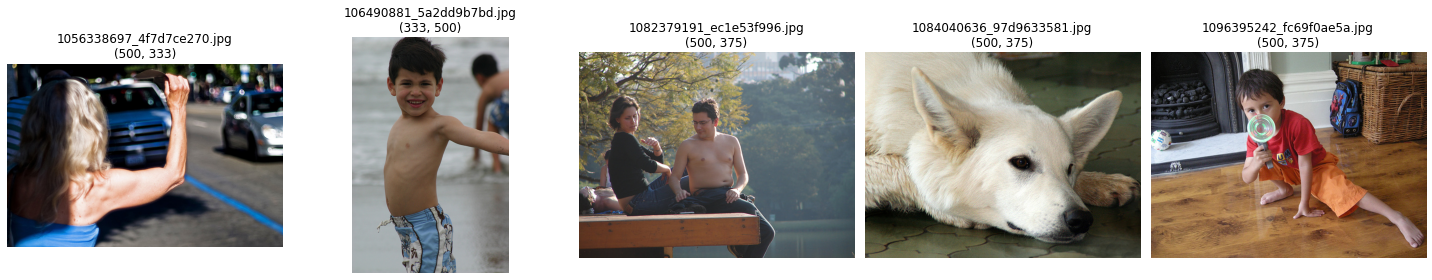

In [9]:
folder_path_1 = os.path.join('data', 'train_img')


train_img = []
for file in os.listdir(folder_path_1):
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        train_img.append(file)

train_img.sort()
first_5_images_tr = train_img[:5]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, img_name in enumerate(first_5_images_tr):
    img_path = os.path.join(folder_path_1, img_name)
    img = Image.open(img_path)

    axes[i].imshow(img)
    axes[i].set_title(f"{img_name}\n{img.size}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


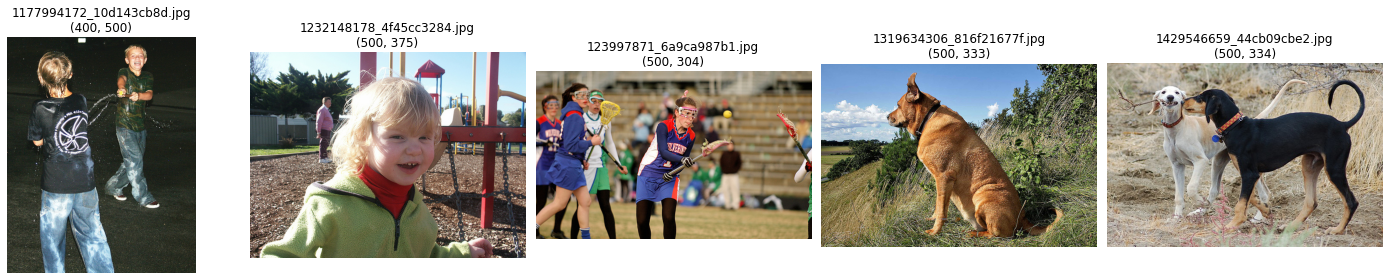

In [10]:
folder_path_2 = os.path.join('data', 'test_img')


test_img = []
for file in os.listdir(folder_path_2):
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        test_img.append(file)

test_img.sort()
first_5_images_ts = test_img[:5]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, img_name in enumerate(first_5_images_ts):
    img_path = os.path.join(folder_path_2, img_name)
    img = Image.open(img_path)

    axes[i].imshow(img)
    axes[i].set_title(f"{img_name}\n{img.size}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


__Комментарий:__ Данные загрузили, убедились, что фото тоже есть на диске и читаются </div>

## __Общая информация__

__Комментарий:__ Информация по _train_dataset_

In [11]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


__Комментарий:__ Информация по _test_queries_

In [12]:
test_queries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   query_id    500 non-null    object
 2   query_text  500 non-null    object
 3   image       500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


__Комментарий:__ Информация по _test_images_

In [13]:
test_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


__Комментарий:__ Информация по _expert_annotations_

In [14]:
expert_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5822 non-null   object
 1   1       5822 non-null   object
 2   2       5822 non-null   int64 
 3   3       5822 non-null   int64 
 4   4       5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


__Комментарий:__ Информация по _crowd_annotations_

In [15]:
crowd_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       47830 non-null  object 
 1   1       47830 non-null  object 
 2   2       47830 non-null  float64
 3   3       47830 non-null  int64  
 4   4       47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


__Промежуточный вывод__   
___
- Пропусков в данных не обнаружено  
- Типы данных корректны  

## __Предобработка данных__

In [16]:
crowd_annotations.columns = ['image', 'query_id', 'part', 'confirmed', 'declined']
crowd_annotations.head(5)

,image,query_id,part,confirmed,declined
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


In [17]:
expert_annotations.columns = ['image', 'query_id', 'exp_1', 'exp_2', 'exp_3']
expert_annotations.head(5)

,image,query_id,exp_1,exp_2,exp_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


__Комментарий:__

Переименнованные столбцы crowd_annotations:

- image -- имя файла изображения;
- query_id -- идентификатор описания;
- part -- доля исполнителей, подтвердивших, что текст соответствует картинке;
- confirmed -- количество исполнителей, подтвердивших, что текст соответствует картинке;
- declined -- количество исполнителей, подтвердивших, что текст не соответствует картинке.

Переименнованные столбцы expert_annotations:

- image -- имя файла изображения;
- query_id -- идентификатор описания;
- exp_1 -- оценка первого эксперта;
- exp_2 -- оценка второго эксперта;
- exp_3 -- оценка третьего эксперта.

### Дубликаты

In [18]:
train_dataset.duplicated().sum()

0

In [19]:
test_queries.duplicated().sum()

0

In [20]:
test_images.duplicated().sum()

0

In [21]:
crowd_annotations.duplicated().sum()

0

In [22]:
expert_annotations.duplicated().sum()

0

__Промежуточный вывод__   
___
- Дубликатов не обнаружено


## __Исследовательский анализ данных__

### Уникальные слова в train_dataset['query_text']

In [23]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
               
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens=word_tokenize(text)           
    
    lemmas = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if len(token) > 2
        and token not in stop_words
        and token.isalpha()
    ]


    return lemmas


tqdm.pandas()
all_lemmas_1 = train_dataset['query_text'].progress_apply(clean_text)


all_words_1 = []
for lemma_list in all_lemmas_1:
    all_words_1.extend(lemma_list)


count_words_1 = Counter(all_words_1)
top_20_words_td = pd.DataFrame(count_words_1.most_common(20), columns=['word', 'frequency'])               

  0%|          | 0/5822 [00:00<?, ?it/s]

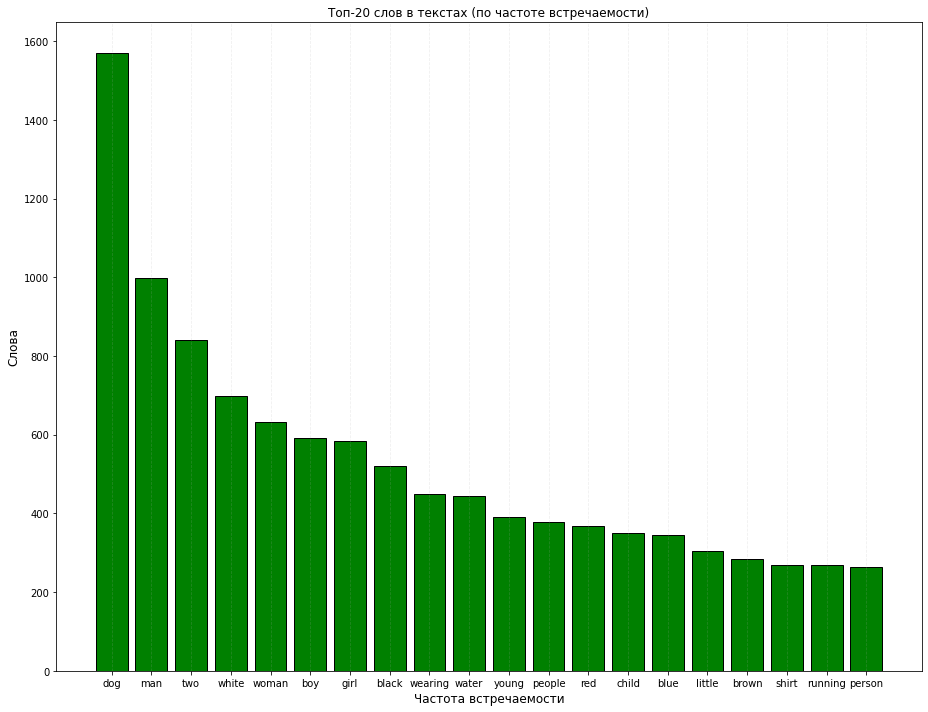

In [24]:
plt.figure(figsize=(13, 10))
plt.bar(top_20_words_td['word'], top_20_words_td['frequency'],
                    color='green', edgecolor='black')


plt.xlabel('Частота встречаемости', fontsize=12)
plt.ylabel('Слова', fontsize=12)
plt.title('Топ-20 слов в текстах (по частоте встречаемости)', fontsize=12)
plt.grid(axis='x', alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()



__Промежуточный вывод:__ Мы вывели наиболее часто встречающиеся слова в описании.  
    Топ-5 позиций занимают:
    
   - dog
   - man
   - white
   - woman
   - boy
    

### Распределение оценок экспертов expert_annotations

In [25]:
def visual_num(data, column):
    
    plt.figure(figsize=(6, 4))

    
    plt.hist(data[column], bins=5, alpha=0.7, edgecolor='black', color='lightblue')
    plt.title(f'Гистограмма: {column}')
    plt.xlabel('Значения')
    plt.ylabel('Частота')

    
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    print('Доп.информация:')
    return data[column].describe()

In [26]:
def visual_cat(data, column):
    
    plt.figure(figsize=(10, 6))
    
   
    value_counts = data[column].value_counts().sort_index()
    
    
    bars = plt.bar(value_counts.index.astype(str), 
                   value_counts.values, 
                   alpha=0.7, 
                   edgecolor='black', 
                   color='lightblue')
    
    plt.title(f'Столбчатая диаграмма: {column}', fontsize=14)
    plt.xlabel('Категории', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    
   
    if len(str(value_counts.index[0])) > 5:
        plt.xticks(rotation=45, ha='right')
    
    plt.grid(axis='y', alpha=0.3)

(None, None, None)

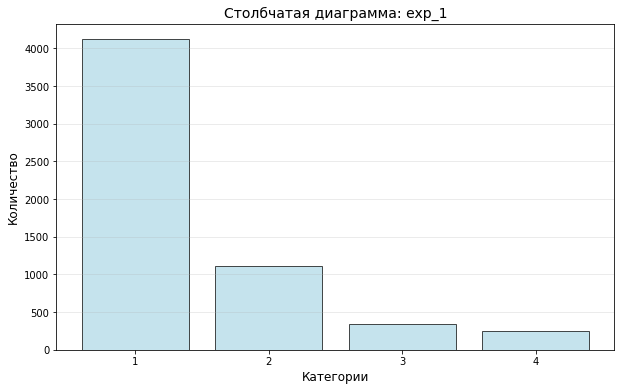

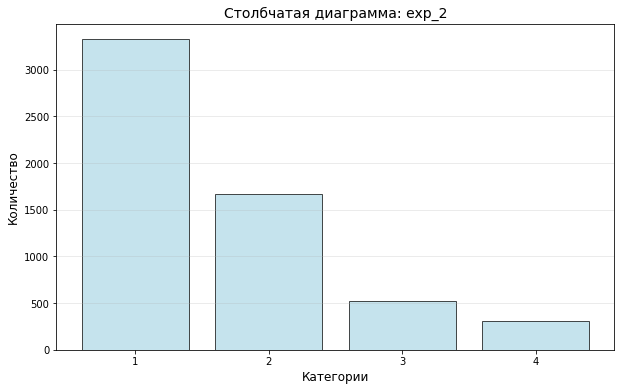

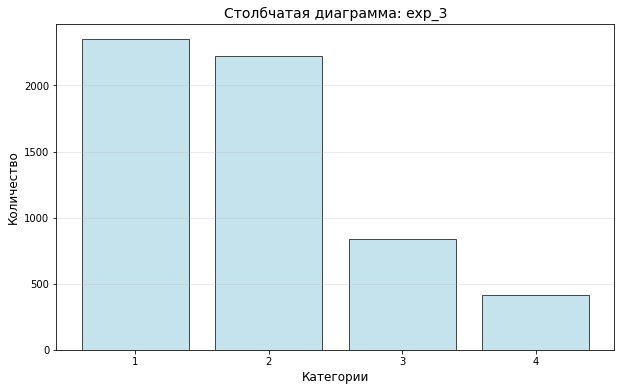

In [27]:
visual_cat(expert_annotations, 'exp_1'), visual_cat(expert_annotations, 'exp_2'), visual_cat(expert_annotations, 'exp_3')

__Промежуточный вывод:__

- Самая частая оценка всех экспертов - 1
- Самая редкая оценка экспретов - 4
- Эксперт с наиболее плавным распределением - 3
- Выбросов или аномалий не наблюдается

### Распределение оценок crowd_annotations

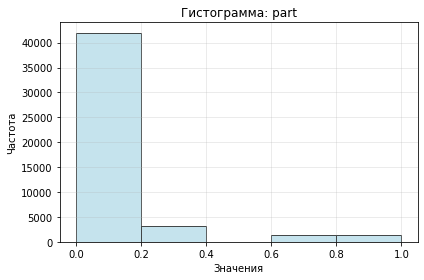

Доп.информация:


count    47830.000000
mean         0.068786
std          0.207532
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: part, dtype: float64

In [28]:
visual_num(crowd_annotations, 'part')

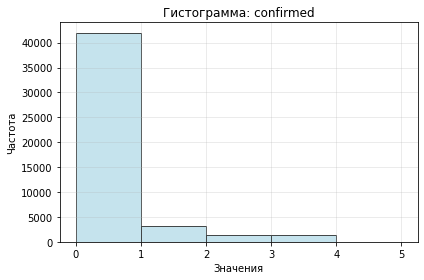

Доп.информация:


count    47830.000000
mean         0.208488
std          0.628898
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: confirmed, dtype: float64

In [29]:
visual_num(crowd_annotations, 'confirmed')

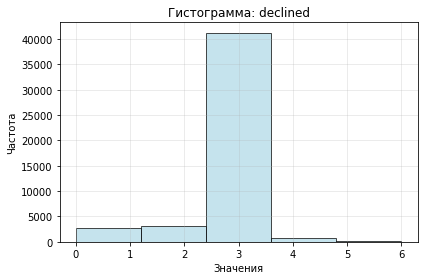

Доп.информация:


count    47830.000000
mean         2.820155
std          0.656676
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          6.000000
Name: declined, dtype: float64

In [30]:
visual_num(crowd_annotations, 'declined')

__Промежуточный вывод:__

- Аномалий и выбросов в данных не обнаружено   

- Средняя доля людей, подтверждивших, что описание соответствует изображению мала - всего 0.068. 0 - 0.1 - самое часто встречающееся значение.  

- Среднее количество людей, подтверждивших, что описание соответствует изображению - 0.2     

- Среднее количество людей, подтверждивших, что описание не соответствует изображению - 2.82. 3 - самое часто встречающеся значение

### Уникальные слова в test_queries['query_text']

In [31]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
               
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens=word_tokenize(text)           
    
    lemmas = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if len(token) > 2
        and token not in stop_words
        and token.isalpha()
    ]


    return lemmas


tqdm.pandas()
all_lemmas_2 = train_dataset['query_text'].progress_apply(clean_text)


all_words_2 = []
for lemma_list in all_lemmas_2:
    all_words_2.extend(lemma_list)


count_words_2 = Counter(all_words_2)
top_20_words_td = pd.DataFrame(count_words_2.most_common(20), columns=['word', 'frequency'])   

  0%|          | 0/5822 [00:00<?, ?it/s]

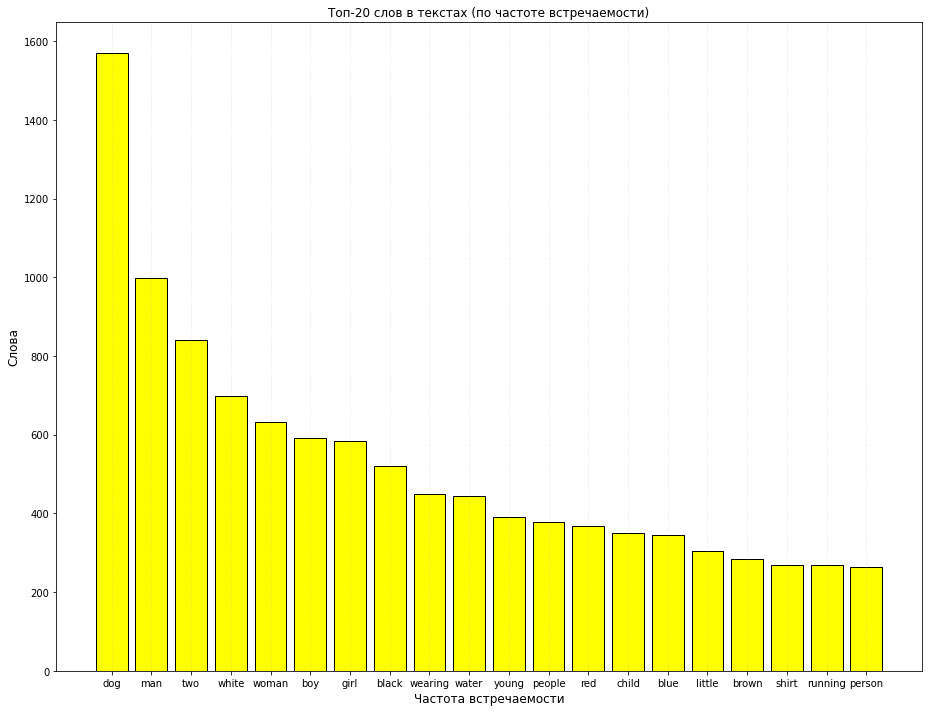

In [32]:
plt.figure(figsize=(13, 10))
plt.bar(top_20_words_td['word'], top_20_words_td['frequency'],
                    color='yellow', edgecolor='black')


plt.xlabel('Частота встречаемости', fontsize=12)
plt.ylabel('Слова', fontsize=12)
plt.title('Топ-20 слов в текстах (по частоте встречаемости)', fontsize=12)
plt.grid(axis='x', alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()


### Финализация оценок по группам

#### _Оценка экспертов_

__Комментарий:__ В качестве функции агрегации для объединения оценок возьму моду, так как она устойчива к выбросам и максимизирует правдоподобие в данной ситуации

In [33]:
expert_annotations['mode_score'] = expert_annotations[['exp_1', 'exp_2', 'exp_3']].mode(axis=1)[0]

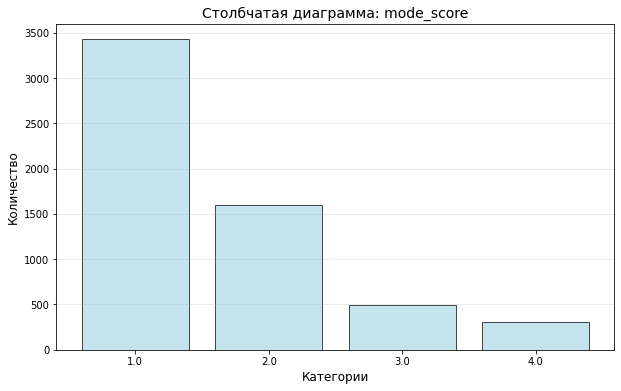

In [34]:
visual_cat(expert_annotations, 'mode_score')

#### _Оценка краудсорсинга_

__Комментарий:__ В данном случае оценка уже подсчитана в столбце part, так как по условию задания это - _"Доля исполнителей, подтвердивших, что текст соответствует картинке."_

### Объединение подготовленных данных

In [35]:
all_annotations = pd.merge(expert_annotations[['image', 'query_id', 'mode_score']],
                     crowd_annotations[['image', 'query_id', 'part']],
                     how='outer',
                     on=['image', 'query_id']
                    )
all_annotations.head(5)

,image,query_id,mode_score,part
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1.0,0.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.0,0.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.0,NaN
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,2.0,NaN
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1.0,NaN


In [36]:
all_annotations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51323 entries, 0 to 51322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       51323 non-null  object 
 1   query_id    51323 non-null  object 
 2   mode_score  5822 non-null   float64
 3   part        47830 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.0+ MB


__Комментарий:__ Получилось много пропусков в оценке экспертов

__Комментарий:__  Теперь надо собрать наши оценки с учетом распределения весов. Мнению экспертов дадим вес 0.7, а краудсорсингу - 0.3.

In [37]:
exp_w = 0.7
crowd_w = 0.3


all_annotations['total_score'] = (
    all_annotations['mode_score'] * exp_w +
    all_annotations['part'] * crowd_w
)


all_annotations['total_score'] = all_annotations['total_score'].fillna(
    all_annotations['mode_score']
)


all_annotations['total_score'] = all_annotations['total_score'].fillna(
    all_annotations['part']
)

all_annotations=all_annotations.drop(['part', 'mode_score'], axis=1)
all_annotations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51323 entries, 0 to 51322
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        51323 non-null  object 
 1   query_id     51323 non-null  object 
 2   total_score  51323 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


__Комментарий:__  Колонка общей оценки теперь без пропусков, остальные столбцы можно удалить. Датафрейм с целевым признаком готов!

__Комментарий:__ Осталось объединить данные в один датафрейм с тренировочными и целевым признаками

In [38]:
data = pd.merge(train_dataset[['image', 'query_id', 'query_text']],
                     all_annotations[['image', 'query_id', 'total_score']],
                     how='outer',
                     on=['image', 'query_id']
                    )
data.head(5)

,image,query_id,query_text,total_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.7
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.0
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.4
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,3.1
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51323 entries, 0 to 51322
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        51323 non-null  object 
 1   query_id     51323 non-null  object 
 2   query_text   5822 non-null   object 
 3   total_score  51323 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


__Комментарий:__ Очистим данные от пропусков и дубликатов

In [40]:
data.isna().sum()

image              0
query_id           0
query_text     45501
total_score        0
dtype: int64

In [41]:
data.duplicated().sum()

0

In [42]:
data['query_text'] = data.groupby('query_id')['query_text'].transform('first')

In [43]:
data.isna().sum()

image             0
query_id          0
query_text     1109
total_score       0
dtype: int64

In [44]:
data.dropna(axis=0, inplace = True)
data.isna().sum()

image          0
query_id       0
query_text     0
total_score    0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50214 entries, 0 to 51322
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        50214 non-null  object 
 1   query_id     50214 non-null  object 
 2   query_text   50214 non-null  object 
 3   total_score  50214 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.9+ MB


__Комментарий:__ Получен мастер-датафрейм признаки/таргет, с которым мы можем продолжать работать

### Проверка данных

__Комментарий:__ Все изображения, которые нарушают закон о несовершеннолетних, нужно удалить из обучающей выборки.

In [46]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
               
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens=word_tokenize(text)           
    
    lemmas = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if len(token) > 2
        and token not in stop_words
        and token.isalpha()
    ]


    return lemmas


tqdm.pandas()
all_lemmas_3 = train_dataset['query_text'].progress_apply(clean_text)


all_words_3 = []
for lemma_list in all_lemmas_3:
    all_words_3.extend(lemma_list)


count_words_3 = Counter(all_words_3)
words_td = pd.DataFrame(list(count_words_3.items()), columns=['word', 'frequency'])

pd.set_option('display.max_rows', None)
words_td  

  0%|          | 0/5822 [00:00<?, ?it/s]

,word,frequency
0,young,391
1,child,349
2,wearing,450
3,blue,346
4,goggles,12
5,sitting,214
6,float,33
7,pool,142
8,girl,584
9,yellow,137


__Комментарий:__ Создадим функцию, которая будет искать запрещенные изображения по словам

In [47]:
def clean_exclude(data, column): 
    
    exclude=['child', 'girl', 'boy', 'little', 'kid', 'baby', 'girls', 'children', 'boys' ,'youth',
'Kids', 'students', 'Girl', 'kids','guys', 'babies', 'teenage', 'Girls', 'teenagers', 'kiddie', 'Children']

    pattern = r'\b(' + '|'.join(exclude) + r')\b'
    
    
    mask = data[column].str.contains(pattern, na=False, case=False, regex=True)
    
    
    bad_data = data[mask].copy()

    
    
    bad_images = set()

        
    for query_id in bad_data['query_id']:
        if isinstance(query_id, str) and '#' in query_id:
            image_name = query_id.split('#')[0]
            bad_images.add(image_name)
        else:
            bad_images.add(str(query_id))    

    print(f"Запрещенных изображений: {len(bad_images)}")
    
    data = data[~data['image'].isin(bad_images)].copy()
    print(f"Стало: {len(data)} строк")
    
    return data

data=clean_exclude(data, 'query_text')


/opt/conda/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Запрещенных изображений: 293
Стало: 35708 строк


__Комментарий:__ В датасете осталось  35708 строк относительно 51321 со словами- признаками

## __Векторизация изображений__

__Комментарий:__ Загрузим предобученную модели ResNet-18 на ImageNet.
ResNet-18 - сверточная нейронная сеть с 18 слоями, эффективная для извлечения признаков из изображений.
Заморозим все параметры модели, чтоб веса не обновлялись при обучении.
Удалим последний полносвязный слой и оставим только сверточную часть для извлечения признаков

In [49]:
resnet = models.resnet18(pretrained = True)

for param in resnet.parameters():
    param.requires_grad_(False)

print(list(resnet.children()))

modules = list(resnet.children())[:-1]
resnet = nn.Sequential(*modules)

resnet.eval()

/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(inplace=True), MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False), Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

__Коментарий:__ Нормализуем пиксели для совместимости с предобученной ResNet

In [50]:
norm = transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
preprocess = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(),norm])

__Комментарий:__ Векторизируем иображения, создав путь и прогнав через Resnet

In [51]:
def vect_img(row):
    img_path = os.path.join(path, row[0])
    img = Image.open(img_path).convert('RGB')
    image_tensor = preprocess(img)
    output_tensor = resnet(image_tensor.unsqueeze(0)).flatten()
    return output_tensor.numpy()

path = os.path.join(PATH_data, 'train_img')

unique_data = data.drop_duplicates(subset=[data.columns[0]])
print(f"Уникальных изображений для обработки: {len(unique_data)}")

features_series = unique_data.progress_apply(vect_img, axis=1)
unique_img_vec_arr = np.array(features_series.tolist())

print(f"Векторизация завершена! Размер результата: {unique_img_vec_arr.shape}")
print(f"Обработано: {unique_img_vec_arr.shape[0]} уникальных изображений")

Уникальных изображений для обработки: 707


  0%|          | 0/707 [00:00<?, ?it/s]

Векторизация завершена! Размер результата: (707, 512)
Обработано: 707 уникальных изображений


__Комментарий:__ Векторизация прошла успешно

## __Векторизация текстов__

__Комментарий:__ Проведем векторизацию текста с помощью TF-IDF

In [52]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return ""
    
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)           
    
    lemmas = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if len(token) > 2
        and token not in stop_words
        and token.isalpha()
    ]

    return ' '.join(lemmas)

data['lemma_text'] = data['query_text'].apply(clean_text)


tfidf_vectorizer = TfidfVectorizer(
    stop_words=list(stopwords)                  
)

data_unique = data.drop_duplicates(subset=['query_text'])
print(f"После удаления дубликатов текстов: {data_unique.shape}")


data_unique = data.drop_duplicates(
    subset=['query_text'], 
    keep='first'  
)


corpus_unique = data_unique['lemma_text'].values
tf_idf_unique = tfidf_vectorizer.fit_transform(corpus_unique)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

print(f"Уникальная матрица: {tf_idf_unique.shape}")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


После удаления дубликатов текстов: (977, 5)
Уникальная матрица: (977, 1290)


__Комментарий:__ Векторизация прошла успешно

## __Объединение векторов__

In [53]:
unique_image_names = data['image'].unique()  
print(f"Уникальных изображений: {len(unique_image_names)}")


img_features_df = pd.DataFrame(
    unique_img_vec_arr,
    columns=[f'img_feat_{i}' for i in range(unique_img_vec_arr.shape[1])]
)


img_features_df['image'] = unique_image_names

Уникальных изображений: 707


In [54]:
tf_idf_dense = tf_idf_unique.toarray()
tf_idf_df = pd.DataFrame(
    tf_idf_dense,
    columns=[f'tfidf_{i}' for i in range(tf_idf_dense.shape[1])]
)
tf_idf_df['query_text'] = data_unique['query_text'].values

In [55]:
final_data = data.merge( 
    img_features_df,
    on='image', 
    how='inner'
).merge(
    tf_idf_df, 
    on='query_text', 
    how='inner'
)

print(f"Исходный размер: {data.shape}")
print(f"Финальный размер с фичами: {final_data.shape}")

Исходный размер: (35708, 5)
Финальный размер с фичами: (35708, 1807)


In [56]:
final_data=final_data.drop(columns=['query_id', 'query_text','lemma_text'])

print(f"Исходный размер: {data.shape}")
print(f"Финальный размер с фичами: {final_data.shape}")

Исходный размер: (35708, 5)
Финальный размер с фичами: (35708, 1804)


In [57]:
final_data.head(5)

,image,total_score,img_feat_0,img_feat_1,img_feat_2,img_feat_3,img_feat_4,img_feat_5,img_feat_6,img_feat_7,...,tfidf_1280,tfidf_1281,tfidf_1282,tfidf_1283,tfidf_1284,tfidf_1285,tfidf_1286,tfidf_1287,tfidf_1288,tfidf_1289
0,1056338697_4f7d7ce270.jpg,0.7,0.693982,3.031816,2.916986,0.951920,0.936225,1.245219,0.826551,1.108059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267528,0.0
1,1262583859_653f1469a9.jpg,1.0,0.428877,1.151234,1.185725,1.280534,0.032984,2.268048,0.465653,0.580446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267528,0.0
2,2621415349_ef1a7e73be.jpg,1.0,2.199274,1.652243,2.472461,0.968294,0.613415,0.603528,2.909680,0.313732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267528,0.0
3,3155451946_c0862c70cb.jpg,1.0,0.476788,0.516116,1.505917,0.879465,0.001574,0.585608,0.055786,0.104646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267528,0.0
4,3222041930_f642f49d28.jpg,1.0,1.859864,2.073177,1.116258,1.751575,0.208846,1.309824,0.316694,0.456553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267528,0.0


In [58]:
final_data['target']=final_data.pop('total_score')

__Комментарий:__ Векторы объединены успешно

## __Обучение модели предсказания соответствия__

### Построение бэйзлайна

__Комемнтарий:__ Поделим выборку, а также масштабируем данные.

In [59]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)

train_indices, valid_indices = next(gss.split(X=final_data.drop(columns=['target']), y=final_data['target'], groups=final_data['image']))
train_df, valid_df = final_data.loc[train_indices], final_data.loc[valid_indices]

In [60]:
X_train = train_df.drop(columns=['target', 'image'])
y_train = train_df['target']

X_valid = valid_df.drop(columns=['target', 'image'])
y_valid = valid_df['target']

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_valid_scaled = scaler_X.transform(X_valid)

with open('scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)

with open('scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)
    
lr=LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)
lr_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print("RMSE модели линейной регрессии:")
print(f"RMSE: {lr_rmse:.6f}")

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_scaled = scaler_y.transform(y_valid.values.reshape(-1, 1)).flatten()

RMSE модели линейной регрессии:
RMSE: 26169462765.018482


__Комментарий:__ Бэйзлайн построен

### Пострение модели

__Коментарйи студента:__ Зададим класс и количество нейронов

In [61]:
n_in_neurons = X_train.shape[1]   
n_out_neurons=1

hidden_n1 = 128  
hidden_n2 = 64   
hidden_n3 = 32   

class Net(nn.Module):        
    def __init__(self, n_in_neurons, hidden_n1, hidden_n2, hidden_n3, n_out_neurons):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(n_in_neurons, hidden_n1)
        self.bn1 = nn.BatchNorm1d(hidden_n1)  
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.1)
        
        self.fc2 = nn.Linear(hidden_n1, hidden_n2)
        self.bn2 = nn.BatchNorm1d(hidden_n2)
        self.act2 = nn.ReLU()
        self.drop2 = nn.Dropout(0.1)
        
        self.fc3 = nn.Linear(hidden_n2, hidden_n3)
        self.bn3 = nn.BatchNorm1d(hidden_n3)
        self.act3 = nn.ReLU()
        
        self.fc4 = nn.Linear(hidden_n3, n_out_neurons)

        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)  
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.drop1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.drop2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.act3(x)

        
        x = self.fc4(x)
  
        
        return x


net = Net(n_in_neurons, hidden_n1, hidden_n2, hidden_n3, n_out_neurons)

In [62]:


net=Net(n_in_neurons, hidden_n1, hidden_n2, hidden_n3, n_out_neurons)


optimizer=torch.optim.Adam(net.parameters(), lr=1e-5)



loss=nn.MSELoss()


epochs = 200
batch_size = 50

num_batches = ceil(len(X_train)/batch_size)

X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled).view(-1, 1)
X_valid_tensor = torch.FloatTensor(X_valid_scaled)
y_valid_tensor = torch.FloatTensor(y_valid_scaled).view(-1, 1)

In [63]:
optimizer_rmse = [] 

for epoch in range(epochs):
    net.train()
    order=np.random.permutation(len(X_train))
        
    for batch in range(num_batches):
        start_idx=batch*batch_size
        optimizer.zero_grad()
            
        b_indexes = order[start_idx:start_idx+batch_size]
        X_b = X_train_tensor[b_indexes]
        y_b = y_train_tensor[b_indexes]
            

        preds = net.forward(X_b)
        
        loss_res = loss(preds, y_b)
        loss_res.backward()
        optimizer.step()
            
    if epoch % 50 == 0 or epoch == epochs-1:
        with torch.no_grad():
            net.eval()
            test_preds= net.forward(X_valid_tensor).flatten()
            result = round(float(torch.sqrt(loss(test_preds, y_valid_tensor))), 2)
            print(f'Метрика RMSE, {epoch} итерация =', result)
            optimizer_rmse.append(result)
print()
print(f'Лучшая метрика RMSE : {min(optimizer_rmse)} ')
print('---------------------------------------------------------------------------------------------', '\n')
          

/opt/conda/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10959, 1])) that is different to the input size (torch.Size([10959])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Метрика RMSE, 0 итерация = 1.31
Метрика RMSE, 50 итерация = 1.09
Метрика RMSE, 100 итерация = 1.11
Метрика RMSE, 150 итерация = 1.12
Метрика RMSE, 199 итерация = 1.14

Лучшая метрика RMSE : 1.09 
--------------------------------------------------------------------------------------------- 



__Комментарий:__ Модель сформирована и обучена

## __Тестирование модели__

### Обработка тестовых данных

__Комментарий:__ Обрабатываем данные тестовой выборки

In [64]:
test_queries=test_queries.drop('Unnamed: 0', axis=1)

In [65]:
def vect_img_2(row_2):
    clean_name = row_2[0].split('#')[0]
    img_path_2 = os.path.join(path_2, clean_name)     
    img_2 = Image.open(img_path_2).convert('RGB')
    image_tensor_2 = preprocess(img_2)
    output_tensor_2 = resnet(image_tensor_2.unsqueeze(0)).flatten()
    return output_tensor_2.numpy()


path_2 = os.path.join(PATH_data, 'test_img')


unique_data_2 = test_queries.drop_duplicates(subset=['image'])
print(f"Уникальных изображений для обработки: {len(unique_data_2)}")

print("Начинаем векторизацию уникальных изображений...")


features_series_2 = unique_data_2.progress_apply(vect_img_2, axis=1)
unique_img_vec_arr_2 = np.array(features_series_2.tolist())

print(f"Векторизация завершена! Размер результата: {unique_img_vec_arr_2.shape}")
print(f"Обработано: {unique_img_vec_arr_2.shape[0]} уникальных изображений")

Уникальных изображений для обработки: 100
Начинаем векторизацию уникальных изображений...


  0%|          | 0/100 [00:00<?, ?it/s]

Векторизация завершена! Размер результата: (100, 512)
Обработано: 100 уникальных изображений


In [66]:
unique_image_names_test = test_queries['image'].unique()  
print(f"Уникальных изображений: {len(unique_image_names_test)}")

img_features_df_test = pd.DataFrame(
    unique_img_vec_arr_2[:len(unique_image_names_test)],  
    columns=[f'img_feat_{i}' for i in range(unique_img_vec_arr_2.shape[1])]
)


img_features_df_test['image'] = unique_image_names_test


Уникальных изображений: 100


In [67]:
print(f"Размер unique_img_vec_arr_2: {unique_img_vec_arr_2.shape}")
print(f"Количество уникальных изображений: {len(unique_image_names_test)}")

Размер unique_img_vec_arr_2: (100, 512)
Количество уникальных изображений: 100


In [68]:
final_data_test = test_queries.merge( 
    img_features_df_test,
    on='image', 
    how='inner'
)

In [69]:
final_data_test.head(5)

,query_id,query_text,image,img_feat_0,img_feat_1,img_feat_2,img_feat_3,img_feat_4,img_feat_5,img_feat_6,...,img_feat_502,img_feat_503,img_feat_504,img_feat_505,img_feat_506,img_feat_507,img_feat_508,img_feat_509,img_feat_510,img_feat_511
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg,0.443964,2.334485,0.006339,2.394352,0.022514,0.32974,1.683887,...,0.141607,0.323036,1.905804,1.066337,0.0,2.231436,2.022536,2.292717,0.793586,0.850107
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg,0.443964,2.334485,0.006339,2.394352,0.022514,0.32974,1.683887,...,0.141607,0.323036,1.905804,1.066337,0.0,2.231436,2.022536,2.292717,0.793586,0.850107
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg,0.443964,2.334485,0.006339,2.394352,0.022514,0.32974,1.683887,...,0.141607,0.323036,1.905804,1.066337,0.0,2.231436,2.022536,2.292717,0.793586,0.850107
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg,0.443964,2.334485,0.006339,2.394352,0.022514,0.32974,1.683887,...,0.141607,0.323036,1.905804,1.066337,0.0,2.231436,2.022536,2.292717,0.793586,0.850107
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg,0.443964,2.334485,0.006339,2.394352,0.022514,0.32974,1.683887,...,0.141607,0.323036,1.905804,1.066337,0.0,2.231436,2.022536,2.292717,0.793586,0.850107


### Предсказание

__Комментарий:__ Напишем функцию, которая будет искать наилучшее изображение для одного единственного описания. Тестировать эту функцию мы будем на разных описаниях.    
    
    

__Подготовка данных__

In [70]:
exclude=['child', 'girl', 'boy', 'little', 'kid', 'baby', 'girls', 'children', 'boys' ,'youth',
'Kids', 'students', 'Girl', 'kids','guys', 'babies', 'teenage', 'Girls', 'teenagers', 'kiddie', 'Children']


def check_child_content(text):
    """Проверка на содержание про детей"""
    pattern = r'\b(' + '|'.join(exclude) + r')\b'
    return bool(re.search(pattern, str(text).lower()))



__Коментарий:__ Напишем фукнцию, которая позволит выводить дисклеймер вместо неподобающих изображений.
    
Функция:
        
- Чистит текст от слов-дубликатов
- Векторизирует текст
- Формирует вектора признаков изображения
- Объединяет признаки (текст+изображение)
- Масштабирует комбинированный вектор
- Прогоняет через нейронную сеть для получения вероятности релевантности
- Сохраняет результаты
- Выводит на экран

In [71]:
def find_and_display_images_for_text(text_query, all_image_data, image_folder_path=folder_path_2, top_k=1, display_mode='best'):
    
    if check_child_content(text_query):
        print("Дисклеймер: запрос содержит слова, связанные с детьми")
        return None
    
    
    cleaned_text = clean_text(text_query)
    print(f"Запрос: '{text_query}'")
        
    text_vector = tfidf_vectorizer.transform([cleaned_text])
    print(f"Размер текстового вектора: {text_vector.shape}")
    
    
    numeric_cols = all_image_data.select_dtypes(include=[np.number]).columns.tolist()
    
    
    all_results = []
    

    for idx, row in all_image_data.iterrows():
        image_id = row['image']
        
       
            
        if numeric_cols:
            image_features = row[numeric_cols].values.astype(np.float32)
        else:
                
            other_cols = [col for col in all_image_data.columns if col != 'image']
            image_features = row[other_cols].values.astype(np.float32)
            
            
        combined_vector = np.concatenate([
            image_features.reshape(1, -1),
            text_vector.toarray()
        ], axis=1)
            
            
            
        scaled_vector = scaler_X.transform(combined_vector)
            
        with torch.no_grad():
            tensor_vector = torch.FloatTensor(scaled_vector)
            prediction_prob = net(tensor_vector).item()
            
        all_results.append({
            'image_id': image_id,
            'probability': float(prediction_prob)
        })
            
        
    df_results = pd.DataFrame(all_results)
    
    
    
    selected_images = df_results.sample(n=min(top_k, len(df_results)))

    
    
    n_cols = min(5, len(selected_images))
    n_rows = (len(selected_images) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
    
    if len(selected_images) == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    axes_flat = axes.flatten()
    
    
    for i, (idx, row) in enumerate(selected_images.iterrows()):
        ax = axes_flat[i]
        img_name = row['image_id']
        prob = row['probability']
        img_path = os.path.join(image_folder_path, img_name)
        
        try:
            img = Image.open(img_path)
            ax.imshow(img)
            title = f"{img_name}\nProb: {prob:.3f}"
            ax.set_title(title, fontsize=9)
        except FileNotFoundError:
            ax.text(0.5, 0.5, f"Файл\nне найден", 
                   ha='center', va='center', fontsize=8, color='red')
        except Exception as e:
            ax.text(0.5, 0.5, f"Ошибка\nзагрузки", 
                   ha='center', va='center', fontsize=8, color='red')
        
        ax.axis('off')
    
    
    for i in range(len(selected_images), len(axes_flat)):
        axes_flat[i].axis('off')
    
    
    plt.suptitle(f"Случайное изображение для: '{text_query[:50]}...'", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    
    return selected_images


### Тест

Запрос: 'Two dogs are shaking water off .'
Размер текстового вектора: (1, 1290)


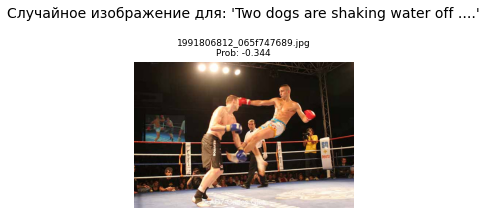

In [72]:
# Теперь тестируем
text_query = final_data_test['query_text'].sample(n=1).iloc[0]

result = find_and_display_images_for_text(
    text_query=text_query,
    all_image_data=final_data_test,
    top_k=1,
    display_mode='random'
)

Запрос: 'A brown dog is grabbing the collar of a black dog .'
Размер текстового вектора: (1, 1290)


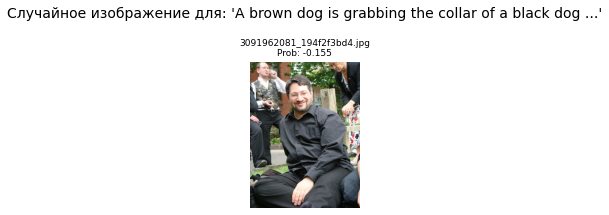

In [73]:
text_query = final_data_test['query_text'].sample(n=1).iloc[0]

result = find_and_display_images_for_text(
    text_query=text_query,
    all_image_data=final_data_test,
    top_k=1,
    display_mode='random'
)

Запрос: 'The brown dog is wearing a black collar .'
Размер текстового вектора: (1, 1290)


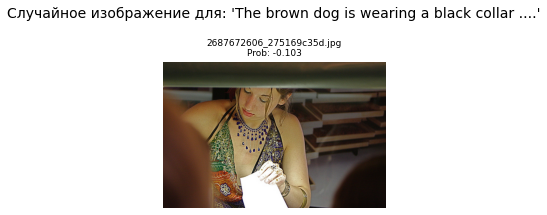

In [74]:
text_query = final_data_test['query_text'].sample(n=1).iloc[0]

result = find_and_display_images_for_text(
    text_query=text_query,
    all_image_data=final_data_test,
    top_k=1,
    display_mode='random'
)

Запрос: 'Grey horse wearing blue cover eating from a orange bucket held by a person in a green shirt .'
Размер текстового вектора: (1, 1290)


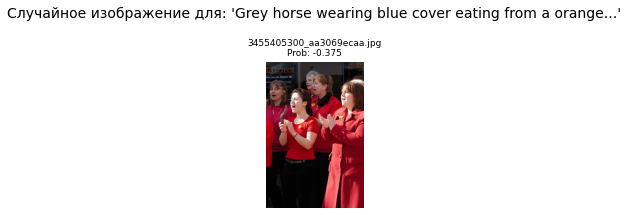

In [75]:
# Теперь тестируем
text_query = final_data_test['query_text'].sample(n=1).iloc[0]

result = find_and_display_images_for_text(
    text_query=text_query,
    all_image_data=final_data_test,
    top_k=1,
    display_mode='random'
)

Запрос: 'An outdoor ice skating rink full of people .'
Размер текстового вектора: (1, 1290)


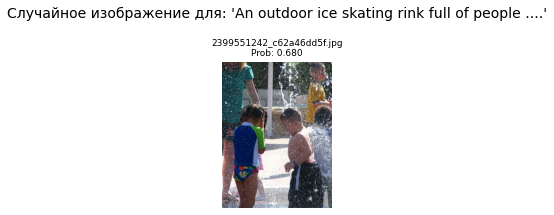

In [76]:
# Теперь тестируем
text_query = final_data_test['query_text'].sample(n=1).iloc[0]

result = find_and_display_images_for_text(
    text_query=text_query,
    all_image_data=final_data_test,
    top_k=1,
    display_mode='random'
)

Запрос: 'Three people are looking into photographic equipment .'
Размер текстового вектора: (1, 1290)


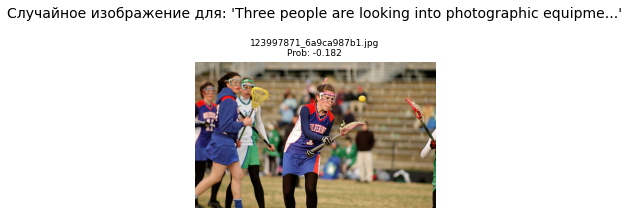

In [77]:
# Теперь тестируем
text_query = final_data_test['query_text'].sample(n=1).iloc[0]

result = find_and_display_images_for_text(
    text_query=text_query,
    all_image_data=final_data_test,
    top_k=1,
    display_mode='random'
)

Запрос: 'Two women jump in the grass atop a mountain .'
Размер текстового вектора: (1, 1290)


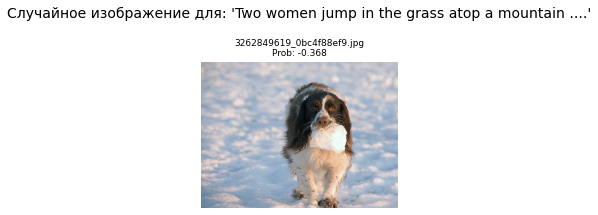

In [78]:
# Теперь тестируем
text_query = final_data_test['query_text'].sample(n=1).iloc[0]

result = find_and_display_images_for_text(
    text_query=text_query,
    all_image_data=final_data_test,
    top_k=1,
    display_mode='random'
)

Запрос: 'A woman wearing a red coat begins to take a picture .'
Размер текстового вектора: (1, 1290)


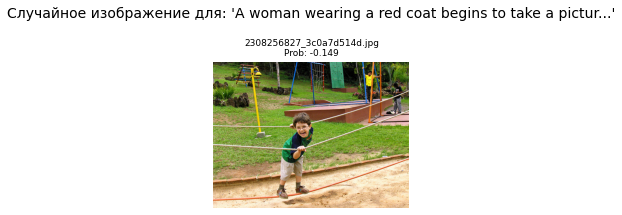

In [79]:
# Теперь тестируем
text_query = final_data_test['query_text'].sample(n=1).iloc[0]

result = find_and_display_images_for_text(
    text_query=text_query,
    all_image_data=final_data_test,
    top_k=1,
    display_mode='random'
)

Запрос: 'A large bird spreading his wings in flight over a body of water .'
Размер текстового вектора: (1, 1290)


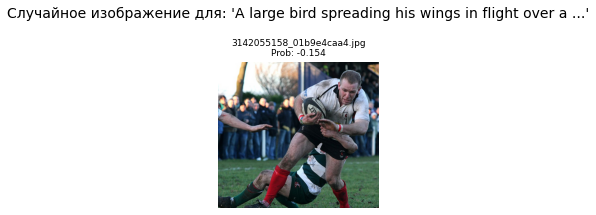

In [80]:
# Теперь тестируем
text_query = final_data_test['query_text'].sample(n=1).iloc[0]

result = find_and_display_images_for_text(
    text_query=text_query,
    all_image_data=final_data_test,
    top_k=1,
    display_mode='random'
)

Запрос: 'A group of people walk through a shopping mall .'
Размер текстового вектора: (1, 1290)


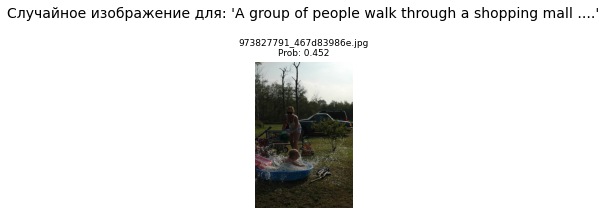

In [81]:
# Теперь тестируем
text_query = final_data_test['query_text'].sample(n=1).iloc[0]

result = find_and_display_images_for_text(
    text_query=text_query,
    all_image_data=final_data_test,
    top_k=1,
    display_mode='random'
)

## __Общий вывод__

<div style="border:solid brown 3px; padding: 20px">

`ОБРАБОТКА ДАННЫХ`

| Исходные данные | 5 источников, 51,321 пар текст-изображение |  
| После очистки | **35,708 пар** (фильтрация детского контента) |  
| Целевой признак | Комбинированная оценка (эксперты 70% + краудсорсинг 30%) |  
| Пропуски | Отсутствуют |  

`ИЗОБРАЖЕНИЯ (ResNet-18)`

| Векторизация | 512 признаков на изображение |  
| Обработано | 707 уникальных тренировочных изображений |  
| Тестовые | 100 изображений векторизовано |  

`ТЕКСТЫ (TF-IDF)`

| Очистка | Лемматизация, удаление стоп-слов |  
| Словарь | **1,290 уникальных признаков** |  
| Векторизация | Успешно применена ко всем текстам |  

`МОДЕЛЬ НЕЙРОННОЙ СЕТИ`
    
- Архитектура: [1804] → [128] → [64] → [32] → [1]
- Активации: ReLU
- Регуляризация: BatchNorm, Dropout
- Оптимизатор: Adam (lr=1e-5)
    

`РЕЗУЛЬТАТЫ ОБУЧЕНИЯ`
| Модель | RMSE | Статус |  
|--------|------|--------|  
| Linear Regression (бейзлайн) | 2.6×10¹⁰ | ❌ Неэффективна |  
| Нейронная сеть | **1.09** | **Лучший результат** |  
| Стабильность обучения | Хорошая сходимость, без переобучения |  

---

`ФУНКЦИОНАЛ ПОИСКА`

**find_and_display_images_for_text()**

Вход: текстовый запрос  
↓  
Проверка на детский контент (законодательство)  
↓  
Векторизация текста (TF-IDF)  
↓  
Комбинация с признаками изображений  
↓  
Оценка через нейронную сеть  
↓  
Визуализация результатов  
↓  
Выход: DataFrame с изображениями и вероятностями   
    
    